# Neural network classification with pytorch

In [503]:
import torch
from torch import nn
import torchvision

import sklearn
from sklearn.datasets import make_circles

import matplotlib.pyplot as plt
import pandas as pd

In [504]:
# Make classification data and get it ready

# make 1000 samples
n_samples = 1000

# create circles
X,y = make_circles(n_samples, noise=0.03, random_state=57)

In [505]:
len(X), len(y)
print(f"First 5 X features:\n{X[:5]}")
print(f"\nFirst 5 y labels:\n{y[:5]}")
# 2 feature of X relate to 1 label of y


First 5 X features:
[[-0.79885014 -0.21122146]
 [-0.40416824 -0.93006724]
 [ 0.35952679  0.92226024]
 [ 0.81032948  0.16657051]
 [-0.65233723 -0.77880979]]

First 5 y labels:
[1 0 0 1 0]


In [506]:
circles = pd.DataFrame({"X1": X[:, 0],
                         "X2": X[:,1],
                         "label" : y})

circles.head(10)

,X1,X2,label
0,-0.798850,-0.211221,1
1,-0.404168,-0.930067,0
2,0.359527,0.922260,0
3,0.810329,0.166571,1
4,-0.652337,-0.778810,0
5,-0.732504,-0.388679,1
6,0.884260,-0.508534,0
7,0.550650,0.843505,0
8,0.636806,0.733344,0
9,0.041497,-0.975589,0


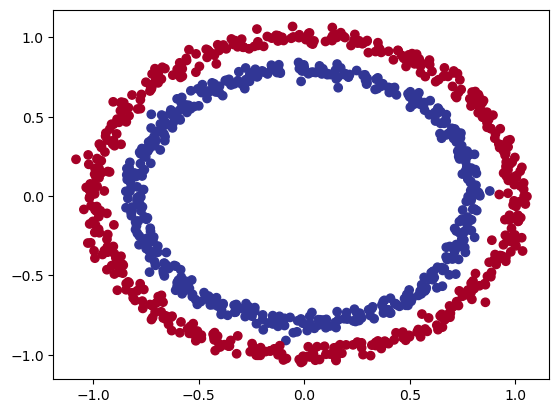

In [507]:
# Visualize
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

In [508]:
# Check ip and op shapes
X.shape, y.shape

((1000, 2), (1000,))

In [509]:
# Turn data to tensor and split

X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)


type(X), X.dtype, y.dtype

(torch.Tensor, torch.float32, torch.float32)

In [510]:
# split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=17)

In [511]:
# Building a model

class CircleModelV1(nn.Module):
    def __init__(self):
        super().__init__()
        # 2 nn.linear layer

        self.layer_1 = nn.Linear(in_features=2, out_features=5)
        self.layer_2 = nn.Linear(in_features=5, out_features=1)

    def forward(self, x):
        return self.layer_2(self.layer_1(x)) # x -> layer1 -> layer2
    

# init a instance
model_0 = CircleModelV1()
model_0


CircleModelV1(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [512]:
model_0 = nn.Sequential(
    nn.Linear(in_features=2, out_features=5),
    nn.Linear(in_features=5, out_features=1)
)


model_0.state_dict()

OrderedDict([('0.weight',
              tensor([[-0.0829, -0.2872],
                      [ 0.4691, -0.5582],
                      [-0.3260, -0.1997],
                      [-0.4252,  0.0667],
                      [-0.6984,  0.6386]])),
             ('0.bias', tensor([-0.6007,  0.5459,  0.1177, -0.2296,  0.4370])),
             ('1.weight',
              tensor([[ 0.0697,  0.3613,  0.0489, -0.1410,  0.1202]])),
             ('1.bias', tensor([-0.1213]))])

In [513]:
# Make Predcitions
with torch.inference_mode():
    untrained_preds = model_0(X_test)
print(f"Length of predictions: {len(untrained_preds)}, Shape: {untrained_preds.shape}")
print(f"Length of test samples: {len(y_test)}, Shape: {y_test.shape}")
print(f"\nFirst 10 predictions:\n{untrained_preds[:10]}")
print(f"\nFirst 10 test labels:\n{y_test[:10]}")

Length of predictions: 200, Shape: torch.Size([200, 1])
Length of test samples: 200, Shape: torch.Size([200])

First 10 predictions:
tensor([[-0.0582],
        [ 0.1561],
        [ 0.1516],
        [-0.0150],
        [ 0.0059],
        [ 0.0722],
        [-0.0012],
        [-0.0825],
        [ 0.2180],
        [ 0.1295]])

First 10 test labels:
tensor([0., 0., 1., 1., 1., 0., 1., 0., 0., 1.])


In [514]:
# Loss func and optimizerr

# for regression, MAE or MSE
# for classisication binary cross entropy or categorical cross entropy

# loss_fn = nn.BCELoss() requires to have go through sigmoid prior inpiut 

loss_fn = nn.BCEWithLogitsLoss() # sigmoid activatoin function builtin


optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)


In [515]:
# Accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [516]:
# Train

#Forward pass - The model goes through all of the training data once, performing its forward() function calculations (model(x_train)).\

#Calculate the loss - The model's outputs (predictions) are compared to the ground truth and evaluated to see how wrong they are (loss = loss_fn(y_pred, y_train).

#Zero gradients - The optimizers gradients are set to zero (they are accumulated by default) so they can be recalculated for the specific training step (optimizer.zero_grad()).

#Perform backpropagation on the loss - Computes the gradient of the loss with respect for every model parameter to be updated (each parameter with requires_grad=True). This is known as backpropagation, hence "backwards" (loss.backward()).

#Step the optimizer (gradient descent) - Update the parameters with requires_grad=True with respect to the loss gradients in order to improve them (optimizer.step()).


In [517]:
# GOing from raw logits -> prediction probabilities -> prediction lables
# Model output are going to be raw logits
# Convert logits into prediction probabilities by passing them by some activation function

# COnvert prediction probabilities to prediction lables by either rounging them or argmax()

In [518]:
model_0.eval()
with torch.inference_mode():
    y_logits = model_0(X_test)[:5]
y_logits

tensor([[-0.0582],
        [ 0.1561],
        [ 0.1516],
        [-0.0150],
        [ 0.0059]])

In [519]:
# USe sigmoid on our logits to turn into prediction probs
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs

tensor([[0.4855],
        [0.5389],
        [0.5378],
        [0.4963],
        [0.5015]])



For our prediction probability values, we need to perform a range-style rounding on them:

* y_pred_probs >= 0.5, `y=1` (class 1)
* y_pred_probs < 0.5, `y=0` (class 0)



In [520]:
# FInd the predicted labels

y_preds = torch.round(y_pred_probs)

# In FUll ( logits -> pred probs -> pred labels)
y_pred_labels = torch.round(torch.sigmoid(model_0(X_test)[:5]))

# CHeck for equality
print(torch.eq(y_preds.squeeze(), y_pred_labels.squeeze()))

y_preds.squeeze()

tensor([True, True, True, True, True])


tensor([0., 1., 1., 0., 1.])

In [521]:
# training loop
torch.manual_seed(57)

epoch = 1000

for epoch in range(epoch):

    model_0.eval()

    # Forward Pass\
    y_logits =   model_0(X_train).squeeze()  
    y_pred = torch.round(torch.sigmoid(y_logits))  

    # Loss and accuracy

    # IF nn.BCELoss
    #loss = loss_fn(torch.sigmoid(y_logits)), y_train
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # OPtimizer zero grad
    optimizer.zero_grad()

    # Loss BAckward (back propogation)
    loss.backward()

    #optimizer step (gradient descent)
    optimizer.step()

    # Testing
    model_0.eval()
    with torch.inference_mode():
        # fwd pass
        test_logits = model_0(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        # TEst Loss
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)
        
    
     # Print out what's happening every 10 epochs
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%")
                            

 

Epoch: 0 | Loss: 0.69895, Accuracy: 53.75% | Test loss: 0.69039, Test acc: 53.50%
Epoch: 10 | Loss: 0.69635, Accuracy: 51.12% | Test loss: 0.69025, Test acc: 54.50%
Epoch: 20 | Loss: 0.69507, Accuracy: 50.00% | Test loss: 0.69071, Test acc: 55.50%
Epoch: 30 | Loss: 0.69435, Accuracy: 49.25% | Test loss: 0.69129, Test acc: 54.00%
Epoch: 40 | Loss: 0.69391, Accuracy: 49.12% | Test loss: 0.69184, Test acc: 52.50%
Epoch: 50 | Loss: 0.69363, Accuracy: 49.50% | Test loss: 0.69233, Test acc: 51.00%
Epoch: 60 | Loss: 0.69343, Accuracy: 49.75% | Test loss: 0.69275, Test acc: 48.50%
Epoch: 70 | Loss: 0.69330, Accuracy: 49.50% | Test loss: 0.69311, Test acc: 47.00%
Epoch: 80 | Loss: 0.69320, Accuracy: 48.75% | Test loss: 0.69342, Test acc: 50.50%
Epoch: 90 | Loss: 0.69313, Accuracy: 48.38% | Test loss: 0.69369, Test acc: 48.00%
Epoch: 100 | Loss: 0.69309, Accuracy: 48.75% | Test loss: 0.69391, Test acc: 47.50%
Epoch: 110 | Loss: 0.69305, Accuracy: 49.75% | Test loss: 0.69411, Test acc: 46.50%
Epo

Epoch: 720 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 730 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 740 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 750 | Loss: 0.69294, Accuracy: 49.25% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 760 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 770 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 780 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69508, Test acc: 45.50%
Epoch: 790 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69507, Test acc: 45.50%
Epoch: 800 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69507, Test acc: 46.00%
Epoch: 810 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69507, Test acc: 46.00%
Epoch: 820 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69507, Test acc: 46.00%
Epoch: 830 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69507, Test acc:

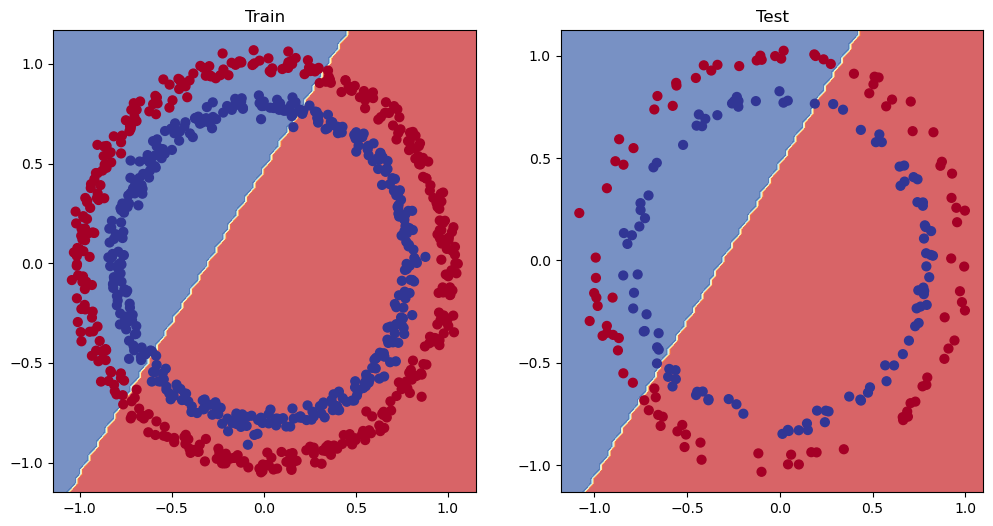

In [522]:


from helper_functions import plot_predictions, plot_decision_boundary
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

#### improve the model

* Addd more layers
* Add more hidden units
* Fit for longer
* Changing the activation function
* Change Learning rate
* Change loss function
 


In [523]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [524]:
class CircleModelV2(nn.Module):
    def __init__(self) :
        super().__init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)

    def forward(self, x):
        return self.layer_3(self.layer_2(self.layer_1(x)))

model_1 = CircleModelV2().to(device)
model_1

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
)

In [525]:

# Losss func

# loss_fn = nn.BCELoss() # Requires sigmoid on input
loss_fn = nn.BCEWithLogitsLoss() # Does not require sigmoid on input


# optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.1)


In [526]:
torch.cuda.manual_seed(57)
torch.manual_seed(57)

epochs = 1000



torch.manual_seed(42)

epochs = 1000 # Train for longer

# Put data to target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


for epoch in range(epochs):
    model_1.train()

    # fwd pass
    y_logits = model_1(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    
    # optimizer zero gradf
    optimizer.zero_grad()

    # loss back
    loss.backward()

    # optimizer step
    optimizer.step()

    # Testing
    model_1.eval()
    with torch.inference_mode():
        # 1. Forward pass
        test_logits = model_1(X_test).squeeze() 
        test_pred = torch.round(torch.sigmoid(test_logits))
        # 2. Caculate loss/accuracy
        test_loss = loss_fn(test_logits,
                            y_test)
        test_acc = accuracy_fn(y_true=y_test,
                               y_pred=test_pred)

    # Print out what's happening every 10 epochs
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test loss: {test_loss:.5f}")

Epoch: 0 | Loss: 0.69469, Accuracy: 53.00% | Test loss: 0.69269
Epoch: 100 | Loss: 0.69300, Accuracy: 48.88% | Test loss: 0.69439
Epoch: 200 | Loss: 0.69294, Accuracy: 49.12% | Test loss: 0.69474
Epoch: 300 | Loss: 0.69294, Accuracy: 49.12% | Test loss: 0.69491
Epoch: 400 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69498
Epoch: 500 | Loss: 0.69294, Accuracy: 49.38% | Test loss: 0.69502
Epoch: 600 | Loss: 0.69294, Accuracy: 49.50% | Test loss: 0.69504
Epoch: 700 | Loss: 0.69294, Accuracy: 49.75% | Test loss: 0.69505
Epoch: 800 | Loss: 0.69294, Accuracy: 49.75% | Test loss: 0.69506
Epoch: 900 | Loss: 0.69294, Accuracy: 49.75% | Test loss: 0.69506


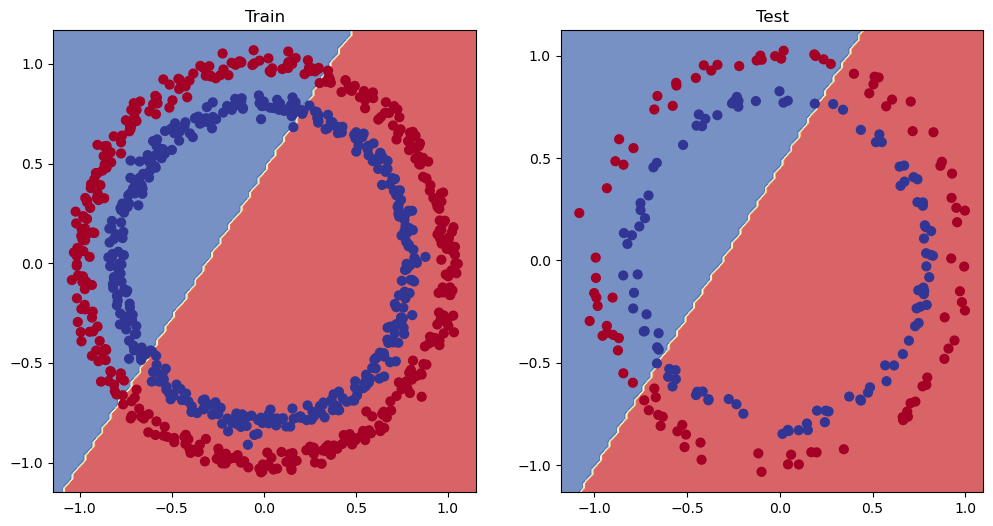

In [527]:
# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_1, X_test, y_test)


# Non Linearity

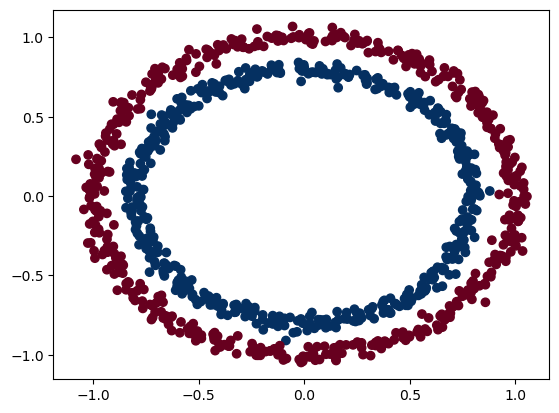

In [528]:
# Non Linearity

# Recraeting nnon- linear data

from sklearn.datasets import make_circles

n_samples = 1000

X,y = make_circles(n_samples = 1000, noise=0.03,
                   random_state=57)
   
plt.scatter(X[:, 0], X[:,1], c=y, cmap=plt.cm.RdBu)

In [529]:
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2,
                                                    random_state=42
)
X_train[:5], y_train[:5]

(tensor([[ 0.7910, -0.5492],
         [-0.9737, -0.2090],
         [-0.9345, -0.4642],
         [-0.4993,  0.5685],
         [-0.3739,  0.7270]]),
 tensor([0., 0., 0., 1., 1.]))

In [530]:
# Build model with non-linearity 

class CircleModelV3(nn.Module):
    def __init__(self, *args, **kwargs) -> None:
        super().__init__(*args, **kwargs)
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()


    def forward(self, x):
        return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))
    


model_3 = CircleModelV3().to(device)
model_3

CircleModelV3(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [531]:
# Loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [532]:
# t5rain
torch.manual_seed(57)
torch.cuda.manual_seed(57)

# Put all data on target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)


epochs = 1000

for epoch in range(epochs):
    # Train
    model_3.train()

    # fwd pass
    y_logits = model_3(X_train).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))

    # calc loss
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_true=y_train,
                      y_pred=y_pred)
    

    # optimize zero
    optimizer.zero_grad()

    #loss back
    loss.backward()

    #optimizer
    optimizer.step()


    # TEsting
    model_3.eval()
    with torch.inference_mode():
        test_logits = model_3(X_test).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits)) # logits -> prediction probabilities -> prediction labels
        # 2. Calcuate loss and accuracy
        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_true=y_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 100 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.69320, Accuracy: 49.12% | Test Loss: 0.69202, Test Accuracy: 53.50%
Epoch: 100 | Loss: 0.69041, Accuracy: 49.88% | Test Loss: 0.69317, Test Accuracy: 48.00%
Epoch: 200 | Loss: 0.68801, Accuracy: 51.62% | Test Loss: 0.69300, Test Accuracy: 46.50%
Epoch: 300 | Loss: 0.68438, Accuracy: 54.12% | Test Loss: 0.69303, Test Accuracy: 47.50%
Epoch: 400 | Loss: 0.67872, Accuracy: 55.62% | Test Loss: 0.69382, Test Accuracy: 47.00%
Epoch: 500 | Loss: 0.67106, Accuracy: 58.00% | Test Loss: 0.69431, Test Accuracy: 50.50%
Epoch: 600 | Loss: 0.66053, Accuracy: 58.00% | Test Loss: 0.69175, Test Accuracy: 50.50%
Epoch: 700 | Loss: 0.64519, Accuracy: 61.75% | Test Loss: 0.68343, Test Accuracy: 53.00%
Epoch: 800 | Loss: 0.62168, Accuracy: 68.88% | Test Loss: 0.66683, Test Accuracy: 62.00%
Epoch: 900 | Loss: 0.58256, Accuracy: 75.00% | Test Loss: 0.63508, Test Accuracy: 64.00%


In [533]:
# Make predictions
model_3.eval()
with torch.inference_mode():
    y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()
y_preds[:10], y[:10] # want preds in same format as truth labels

(tensor([1., 0., 1., 0., 1., 0., 1., 1., 1., 0.], device='cuda:0'),
 tensor([1., 0., 0., 1., 0., 1., 0., 0., 0., 0.]))

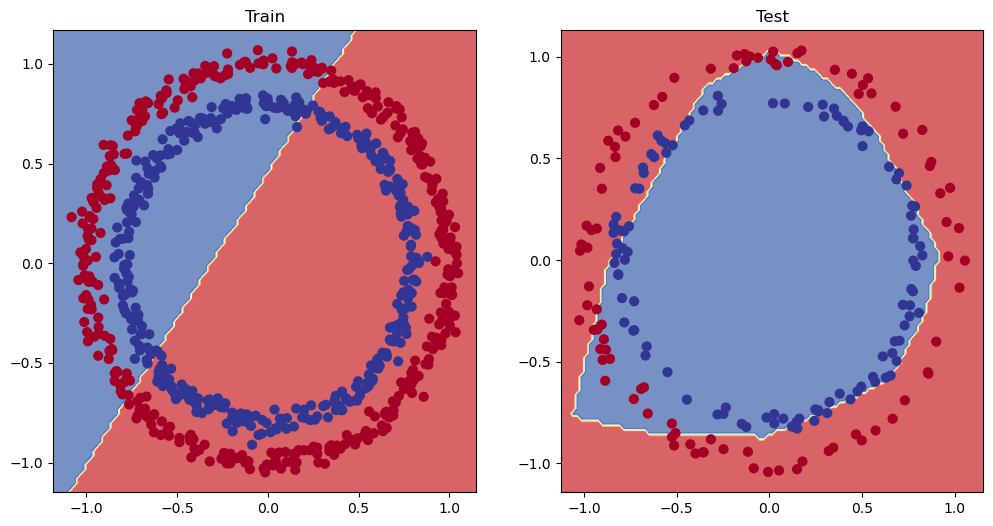

In [534]:


# Plot decision boundaries for training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_1, X_train, y_train) # model_1 = no non-linearity
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test) # model_3 = has non-linearity


# Multiclass classification

tensor([[ 2.7017, -0.4444],
        [ 7.3516,  8.7878],
        [ 1.7707,  1.2210],
        [ 8.3679, 11.8708],
        [-0.5860, -5.3500]]) tensor([2, 3, 2, 3, 1])


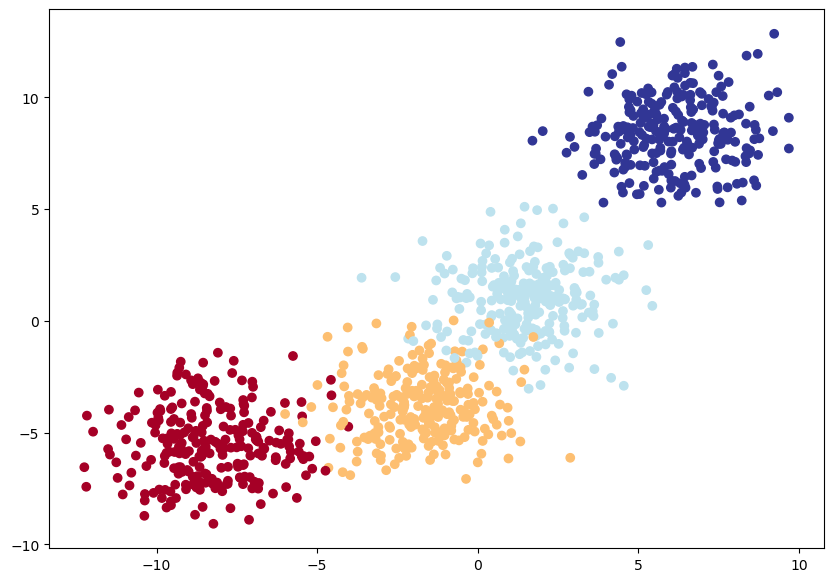

In [535]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 4
NUM_FEATURES = 2
RANDOM_SEED = 57

# 1. Create multi-class data
X_blob, y_blob = make_blobs(n_samples=1000,
    n_features=NUM_FEATURES, # X features
    centers=NUM_CLASSES, # y labels 
    cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
    random_state=RANDOM_SEED
)

# 2. Turn data into tensors
X_blob = torch.from_numpy(X_blob).type(torch.float)
y_blob = torch.from_numpy(y_blob).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
plt.figure(figsize=(10, 7))
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

In [536]:
# Create device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [537]:
from torch import nn

# Build model
class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            # nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=hidden_units, out_features=output_features), # how many classes are there?
        )
    
    def forward(self, x):
        return self.linear_layer_stack(x)

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=8).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2, out_features=8, bias=True)
    (1): Linear(in_features=8, out_features=8, bias=True)
    (2): Linear(in_features=8, out_features=4, bias=True)
  )
)

In [538]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.001) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [539]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[-1.6466,  1.1922, -0.0640, -2.1875],
        [ 1.0254, -1.0102, -0.6705,  2.0158],
        [-0.5737,  0.7577, -0.2198, -0.3999],
        [-0.0805,  0.7407, -0.2558,  0.4626],
        [-0.7348,  1.1037, -0.1416, -0.6059]], device='cuda:0',
       grad_fn=<SliceBackward0>)

In [540]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([4]), 4)

In [541]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[ 1.2866, -1.4251, -0.7687,  2.3824],
        [-0.3173,  0.3117, -0.3238, -0.0487],
        [ 0.6234, -0.4042, -0.5257,  1.4444],
        [ 1.2401, -1.4323, -0.7670,  2.2991],
        [ 0.1839,  0.3188, -0.3555,  0.8333]], device='cuda:0',
       grad_fn=<SliceBackward0>)
tensor([[0.2389, 0.0159, 0.0306, 0.7147],
        [0.1931, 0.3623, 0.1919, 0.2527],
        [0.2533, 0.0907, 0.0803, 0.5757],
        [0.2447, 0.0169, 0.0329, 0.7055],
        [0.2154, 0.2466, 0.1256, 0.4124]], device='cuda:0',
       grad_fn=<SliceBackward0>)


In [542]:
# Sum the first sample output of the softmax activation function 
torch.sum(y_pred_probs[0])

tensor(1.0000, device='cuda:0', grad_fn=<SumBackward0>)

In [543]:
# Which class does the model think is *most* likely at the index 0 sample?
print(y_pred_probs[0])
print(torch.argmax(y_pred_probs[0]))

tensor([0.2389, 0.0159, 0.0306, 0.7147], device='cuda:0',
       grad_fn=<SelectBackward0>)
tensor(3, device='cuda:0')


In [548]:
# Fit the model
torch.manual_seed(42)
torch.cuda.manual_seed(57)

# Set number of epochs
epochs = 10000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cpu and cuda:0! (when checking argument for argument mat1 in method wrapper_CUDA_addmm)

In [545]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([[ 14.4465,   9.7896,  -4.9307, -14.9268],
        [ -2.6749,  -0.0319,   2.2468,  -0.8047],
        [  6.5495,   7.0952,  -1.2428,  -9.9996],
        [ 14.1056,   9.2451,  -4.8596, -14.3441],
        [  1.1911,   5.5207,   1.3118,  -6.8756],
        [  8.4861,   8.2959,  -2.0362, -11.6745],
        [-21.0722,  -9.3854,  10.2060,  13.3327],
        [ -5.9450,  -1.2486,   3.7532,   1.3229],
        [-21.6681, -12.1879,   9.9499,  15.9508],
        [  2.2292,   4.8811,   0.6227,  -6.6644]], device='cuda:0')

In [546]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

Predictions: tensor([0, 2, 1, 0, 1, 0, 3, 2, 3, 1], device='cuda:0')
Labels: tensor([0, 2, 1, 0, 1, 0, 3, 2, 3, 1], device='cuda:0')
Test accuracy: 96.0%


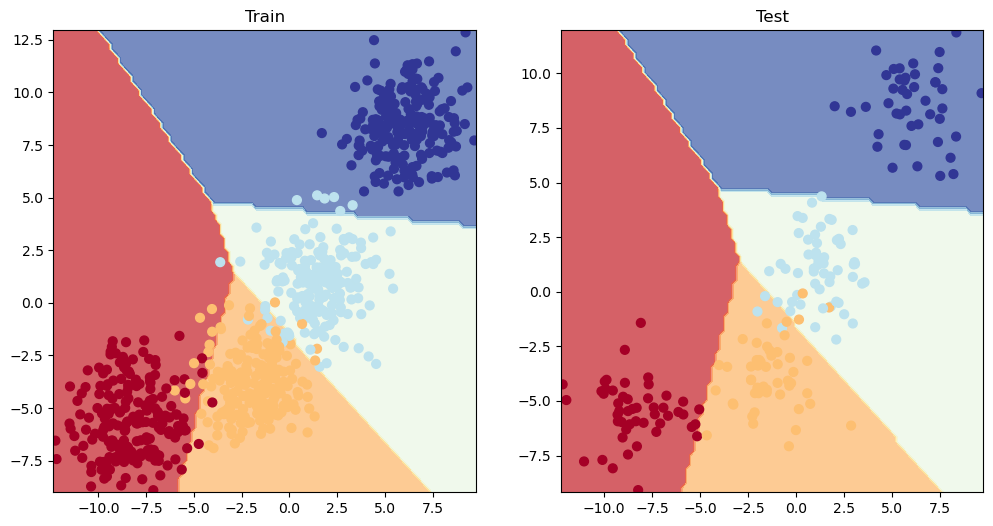

In [547]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_4, X_blob_train, y_blob_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_4, X_blob_test, y_blob_test)